In [1]:
import operator
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# See: Optimal detection of changepoints with a linear computational cost https://arxiv.org/pdf/1101.1438
# Algorithm 1

# Cost function: Residual sum of squares
def rss(segment):
    mu = np.mean(segment)
    return sum((segment - np.mean(segment))**2)

# Optimal paritioning - Quite inefficient!
def optimal_partitioning(data, cost_function, penalty):
    n = len(data)
    F = np.zeros(n+1)
    F[0] = -penalty
    chpts = np.zeros(n+1, dtype = int)
    for t in range(2, n+1):
        f = np.zeros(t)
        for s in range(t):
            f[s] = F[s] + cost_function(data[s:t]) + penalty
        tau, F[t] = min(enumerate(f), key=operator.itemgetter(1))
        chpts[t] = tau

    # get changepoints
    CP = []
    last = chpts[n]
    if last > 0:
        CP.append(last)
    while last > 0:
        last = chpts[last]
        if last > 0:
            CP.append(last)
    CP.sort()
    return CP

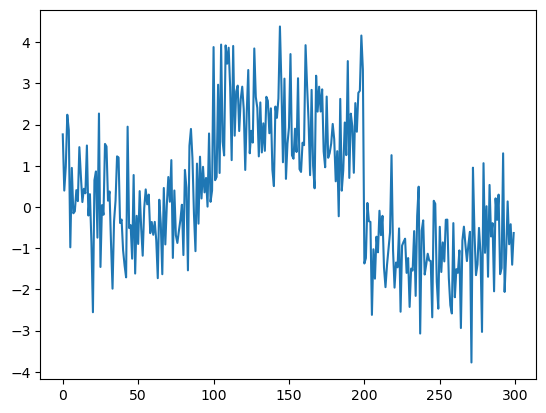

In [3]:
# sim data
np.random.seed(0)
X = np.concatenate((np.random.normal(size=100), np.random.normal(size=100) + 2, np.random.normal(size=100) - 1))
plt.plot(X)

In [4]:
# Run OP
optimal_partitioning(X, cost_function = rss, penalty = 2*np.var(X)*np.log(len(X)))

[100, 200]